In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def func(x, c): 
    return sum([c[i] * x**i for i in range(len(c))])

num_data_points = 300
degree = 3

X = np.random.uniform(-10, 10, num_data_points)
c = [np.random.uniform(-3, 3) for _ in range(degree + 1)]
y = np.array( [func(X[i], c) for i in range(num_data_points)] )

mu, sigma = 0, 50
noise = np.random.normal(mu, sigma, num_data_points)

y = np.add(y, noise)

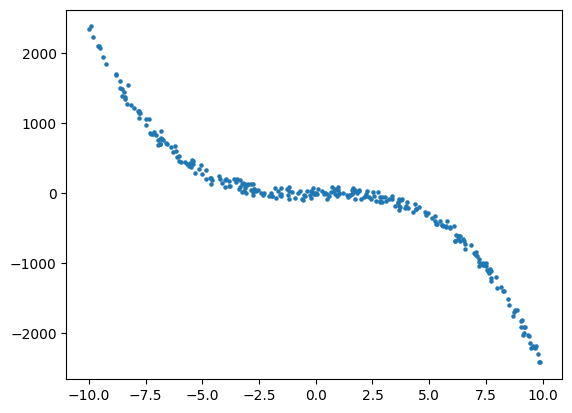

In [4]:
plt.scatter(X, y, s = 5)

In [5]:
def create_poly_data(X=None, c=None, b=None, 
                     degree=3, num_points=300, 
                     X_lower=-10, X_higher=10, 
                     c_lower=-3, c_higher=3,
                     noise=True, noise_mu=0, 
                     noise_sigma=50, plot=False):
    
    def func(x, c): 
        return sum([c[i] * x**i for i in range(len(c))])
    
    if X == None: 
        X = np.random.uniform(X_lower, X_higher, num_points)
    if c == None: 
        c = [np.random.uniform(c_lower, c_higher) for _ in range(degree + 1)]
    
    y = np.array( [func(X[i], c) for i in range(num_points)] )
    
    if noise: 
        noise = np.random.normal(noise_mu, noise_sigma, num_points)
        y = [i + j for i, j in zip(y, noise)]
    
    if plot:
        plt.scatter(X, y, s = 5)
        plt.show()

In [13]:
print(len(X)*3//4)
print(len(y)*3//4)

225
225


In [6]:
x_tr, y_tr = np.array(X[:len(X)*3//4]), np.array(y[:len(y)*3//4])
x_val, y_val = np.array(X[len(X)*3//4:]), np.array(y[len(y)*3//4:])

print('Training set length: {}\nValidation set length: {}'.format(len(x_tr), len(x_val)))


Training set length: 225
Validation set length: 75


In [16]:
W = [np.random.random() for _ in range(degree + 1)] 
W

[0.21815567852290707,
 0.7243650214978383,
 0.8959762571573194,
 0.2727605789816946]

In [18]:
def update_weights(degree, x, y):
    A = np.linalg.inv(np.array( 
        [ [sum(np.power(x, i)) for i in range(j, degree + 1 + j)] for j in range(degree + 1) ]
    ))

    return np.dot(A, np.array( [ sum(y * np.power(x, i)) for i in range(degree+1) ] ))

def predict(W, x):
    return sum([W[i] * x**i for i in range(len(W))])
    
W = update_weights(3, x_tr, y_tr)
g = predict(W, x_tr)

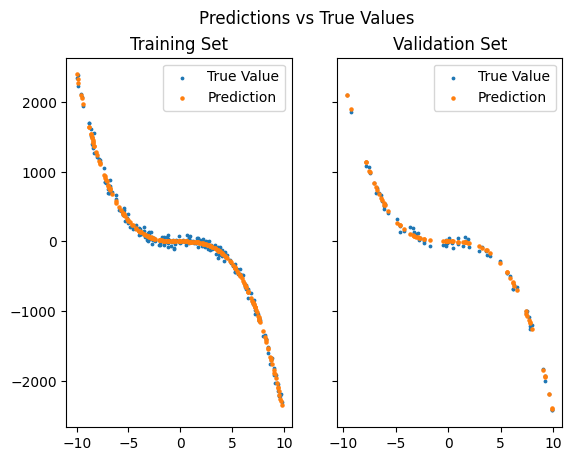

In [19]:
def plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val):
    fig, axs = plt.subplots(1, 2, sharey = True)
    fig.suptitle('Predictions vs True Values')

    axs[0].scatter(x_tr, y_tr, s = 3, label = 'True Value')
    axs[0].scatter(x_tr, g, s = 5, label = 'Prediction')
    axs[0].legend()
    axs[0].set_title('Training Set')

    axs[1].scatter(x_val, y_val, s = 3, label = 'True Value')
    axs[1].scatter(x_val, g_val, s = 5, label = 'Prediction')
    axs[1].legend()
    axs[1].set_title('Validation Set')
    
    plt.show()
    
g_val = sum([W[i] * x_val**i for i in range(len(W))])

plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val)

# Root mean Square Error

In [20]:
def RSE(y, g): 
    return sum(np.square(y - g)) / sum(np.square(y - 1 / len(y)*sum(y)))

error = RSE(y_val, g_val)
print('RSE: {}'.format(error))

R_squared = 1 - error
print('R_squared: {:.4f}'.format(R_squared))

RSE: 0.003368317774873456
R_squared: 0.9966


In [21]:
A = np.linalg.inv(np.array( 
    [ [sum(np.power(x_tr, i)) for i in range(j, degree + j)] for j in range(degree) ]
))

W = np.dot(A, np.array( [ sum(y_tr * np.power(x_tr, i)) for i in range(degree) ] ))

#Predictions
g = sum([W[i] * x_tr**i for i in range(len(W))])

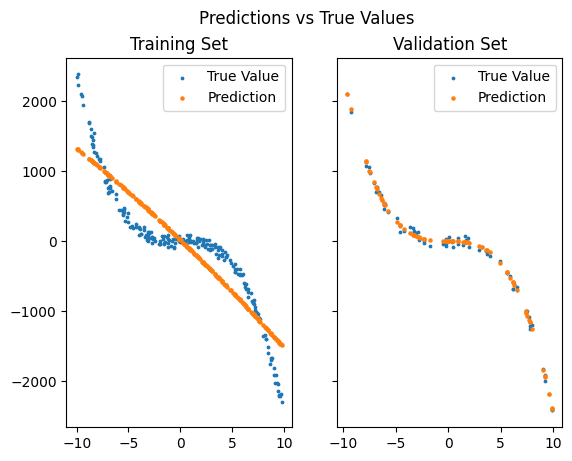

In [22]:
plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val)

In [23]:
degree = 6

A = np.linalg.inv(np.array( 
    [ [sum(np.power(x_tr, i)) for i in range(j, degree + j)] for j in range(degree) ]
))

W = np.dot(A, np.array( [ sum(y_tr * np.power(x_tr, i)) for i in range(degree) ] ))

#Predictions
g = sum([W[i] * x_tr**i for i in range(len(W))])

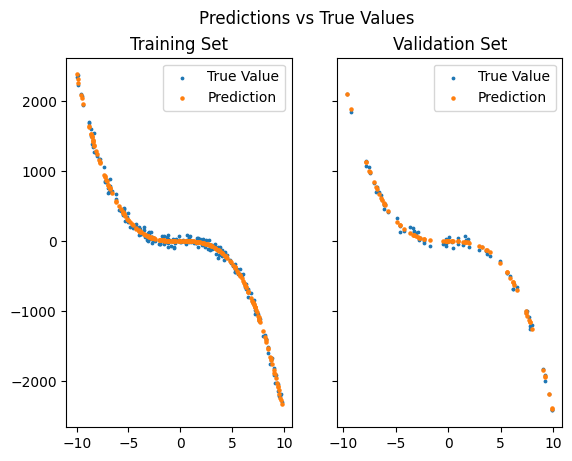

In [24]:
plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val)

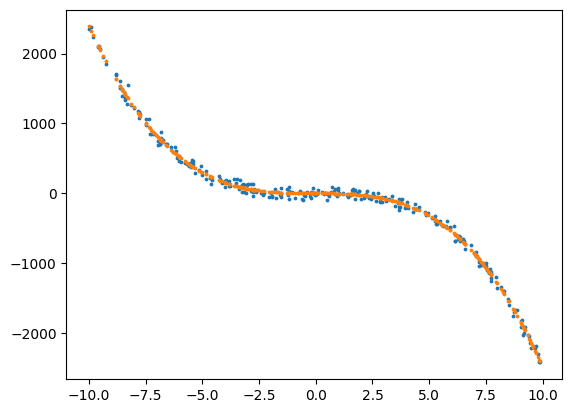

In [25]:
np_model = np.poly1d(np.polyfit(X, y, 3))

plt.scatter(X, y, s = 3, label = 'Data')
plt.scatter(X, np_model(X), s = 3, label = 'Numpy Predictions')

### Reference
### Ethem Alpaydin. 2010. Introduction to Machine Learning (2nd. ed.). The MIT Press.
### Berat Yildirim. 2022 Regression with Python from Scratch — Polynomial Regression, May 7, 2022. MLearning.ai


# Appendix

#### Poly method for regression class

In [29]:
class regression():
    def __init__(self, degree):
        self.degree = degree
            
    def random_data(self, X=None, c=None, b=None, 
                         degree=3, num_points=300, 
                         X_lower=-10, X_higher=10, 
                         c_lower=-3, c_higher=3,
                         noise=True, noise_mu=0, 
                         noise_sigma=50, plot=False):

        def func(x, c): 
            return sum([c[i] * x**i for i in range(len(c))])

        if X == None: 
            self.X = np.random.uniform(X_lower, X_higher, num_points)
        if c == None: 
            self.c = [np.random.uniform(c_lower, c_higher) for _ in range(degree + 1)]

        self.y = np.array( [func(self.X[i], self.c) for i in range(num_points)] )

        if noise: 
            noise = np.random.normal(noise_mu, noise_sigma, num_points)
            self.y = [i + j for i, j in zip(self.y, noise)]

        if plot:
            plt.scatter(self.X, self.y, s = 5)
            plt.show()
        
        return self.X, self.y
            
    def split(self, X, y):
        x_tr, y_tr = np.array(X[:len(X)*3//4]), np.array(y[:len(y)*3//4])
        x_val, y_val = np.array(X[len(X)*3//4:]), np.array(y[len(y)*3//4:])
        
        return x_tr, y_tr, x_val, y_val

    def train(self, x, y):
        A = np.linalg.inv(np.array( 
            [ [sum(np.power(x, i)) for i in range(j, self.degree + 1 + j)] for j in range(self.degree + 1) ]
        ))

        self.W = np.dot(A, np.array( [ sum(y * np.power(x, i)) for i in range(self.degree+1) ] ))
    
    def predict(self, x):
        self.pred = sum([self.W[i] * x**i for i in range(len(self.W))])
        return self.pred
    
    def plot_data_vs_estimation(self, x, y, pred):
        plt.scatter(x, y, s = 3, label = 'True Value')
        plt.scatter(x, pred, s = 5, label = 'Prediction')
        plt.legend()
        plt.show()
        
    def RSE(self, y, g): 
        return sum(np.square(y - g)) / sum(np.square(y - 1 / len(y)*sum(y)))


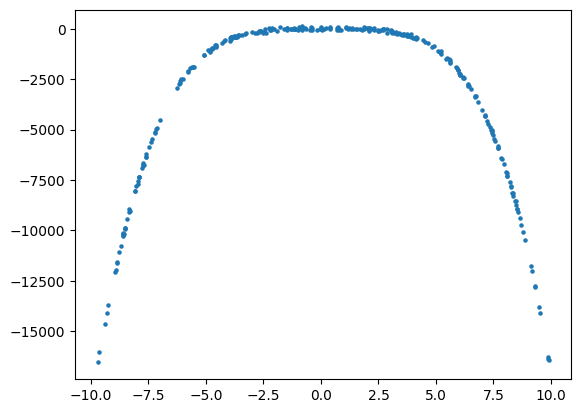

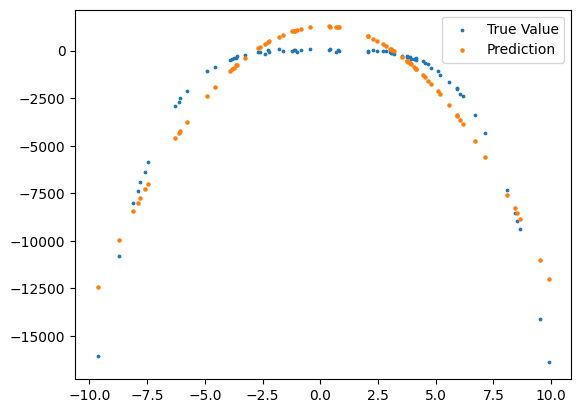

Error: 0.09


In [30]:
r = regression(3)

X, y = r.random_data(degree = 4, plot = True)
x_tr, y_tr, x_val, y_val = r.split(X, y)
r.train(x_tr, y_tr)
preds = r.predict(x_val)
r.plot_data_vs_estimation(x_val, y_val, preds)
print('Error: {:.2f}'.format(r.RSE(y_val, preds)))